# Fuzzy Systems Laboratory Project

**Participants** \
NTEGANO Bahenda Yvon Dylan : 515657 \
SALAMI Matteo : 513974

In [2]:
! pip install softpy
import numpy as np
import matplotlib.pyplot as plt
#sys.path.append("../source/")
from softpy.fuzzy.fuzzyset import ContinuousFuzzySet
from softpy.fuzzy.operations import *

  Preparing metadata (setup.py) ... done
  Created wheel for softpy: filename=softpy-0.0.5-py3-none-any.whl size=18565 sha256=2de556f8f85ac9a146e78349a2c8148d5c359f5e2e80be01a479e3d05063c12e
  Stored in directory: /root/.cache/pip/wheels/fb/a9/42/31bc4cd4d93817e158d879bf5e7dc7f50610f178e30a6e1717
Successfully built softpy


### Alpha Fuzzy Set

In [3]:
class AlphaFuzzySet(ContinuousFuzzySet):
    def __init__(self, collection):
        # Ensure the collection is in the correct format
        if not all(isinstance(i, list) for i in collection.values()):
            raise ValueError("Each alpha-cut should be a list of intervals")

        self.collection = collection
        # Filter out infinite bounds for plotting purposes
        finite_intervals = [
            interval for intervals in collection.values() for interval in intervals
            if not (interval[0] == float('-inf') or interval[1] == float('inf'))
        ]
        self.min = min(interval[0] for interval in finite_intervals)
        self.max = max(interval[1] for interval in finite_intervals)
        # super().__init__(min=self.min, max=self.max)

    def __getitem__(self, alpha):
        return self.collection.get(alpha, [])

    def __call__(self, element):
        for alpha in sorted(self.collection.keys(), reverse=True):
            if any(interval[0] <= element <= interval[1] for interval in self.collection[alpha]):
                return alpha
        return 0.0

    def __eq__(self, other):
        if not isinstance(other, AlphaFuzzySet):
            return False
        return self.collection == other.collection

    def hartley(self):
        pass

    def visualize(self, ax=None, label=None):
        if ax is None:
            ax = plt.gca()
        x_values = np.linspace(self.min, self.max, 500)
        y_values = [self(x) for x in x_values]

        ax.plot(x_values, y_values, label=label)
        ax.set_title('Membership Functions')
        ax.set_xlabel('Universe of Discourse')
        ax.set_ylabel('Membership Degree')
        ax.set_ylim(0, 1.1)
        ax.grid(True)

    def visualize_horizontally(self, ax=None, label=None):
        if ax is None:
            ax = plt.gca()

        for alpha, intervals in self.collection.items():
            for interval in intervals:
                ax.plot(interval, [alpha, alpha], 'b')
                # ax.plot([interval[0], interval[0]], [0, alpha], 'r--', alpha=0.5)
                # ax.plot([interval[1], interval[1]], [0, alpha], 'r--', alpha=0.5)

        ax.set_title('Alpha Cuts Visualization')
        ax.set_xlabel('Interval')
        ax.set_ylabel('Alpha')
        ax.set_xlim(0, 20)
        ax.set_ylim(-0.2, 1.2)
        if label:
            ax.legend([label])

### Alpha Fuzzy Combination

In [4]:
class AlphaFuzzyCombination(ContinuousFuzzyCombination):
    def __init__(self, fuzzy_set1, fuzzy_set2, function):
        if not (isinstance(fuzzy_set1, AlphaFuzzySet) and isinstance(fuzzy_set2, AlphaFuzzySet)):
            raise ValueError("Inputs must be instances of AlphaFuzzySet")
        self.fuzzy_set1 = fuzzy_set1
        self.fuzzy_set2 = fuzzy_set2
        self.function = function
        self.result = self.combine()

    def combine(self):
        result_collection = {}
        for alpha1 in self.fuzzy_set1.collection.keys():
            for alpha2 in self.fuzzy_set2.collection.keys():
                combined_alpha = self.function(alpha1, alpha2)
                if combined_alpha not in result_collection:
                    result_collection[combined_alpha] = []

                intervals1 = self.fuzzy_set1[alpha1]
                intervals2 = self.fuzzy_set2[alpha2]

                combined_intervals = [self.combine_intervals(interval1, interval2) for interval1 in intervals1 for interval2 in intervals2]
                result_collection[combined_alpha].extend(combined_intervals)
        return AlphaFuzzySet(result_collection)

    @staticmethod
    def combine_intervals(interval1, interval2):
        return [max(interval1[0], interval2[0]), min(interval1[1], interval2[1])]

    def visualize(self):
        fig, ax = plt.subplots(figsize=(10, 5))
        self.fuzzy_set1.visualize(ax, label='Fuzzy Set 1')
        self.fuzzy_set2.visualize(ax, label='Fuzzy Set 2')
        self.result.visualize(ax, label='Combined Fuzzy Set')
        ax.legend()
        plt.show()

### Custom Functions

In [5]:
# T-norm (intersection) for alpha cuts
def t_norm_min(alpha1, alpha2):
    # Calculate intersection of two alpha cuts
    return min(alpha1, alpha2)

# T-conorm (union) for alpha cuts
def t_conorm_max(alpha1, alpha2):
    # Calculate union of two alpha cuts
    return max(alpha1, alpha2)

# Addition for alpha cuts
def addition(alpha1, alpha2):
    # Calculate addition of two alpha cuts
    return min(1, alpha1 + alpha2)  # Ensure the result does not exceed 1

# Multiplication for alpha cuts
def multiplication(alpha1, alpha2):
    # Calculate multiplication of two alpha cuts
    return alpha1 * alpha2

# Łukasiewicz T-norm for alpha cuts
def lukasiewicz_t_norm(alpha1, alpha2):
    return max(0, alpha1 + alpha2 - 1)

# Łukasiewicz T-conorm for alpha cuts
def lukasiewicz_t_conorm(alpha1, alpha2):
    return min(1, alpha1 + alpha2)

### Fuzzy sets examples

In [6]:
# Example for intervals for triangular fuzzy sets
interval1 = {
    1.0: [[10, 10]],
    0.8: [[9.5, 10.5]],
    0.6: [[9, 11]],
    0.4: [[8.5, 11.5]],
    0.2: [[8, 12]],
    0.0: [[float('-inf'), float('inf')]]
}

interval2 = {
    1.0: [[12, 12]],
    0.8: [[11.5, 12.5]],
    0.6: [[11, 13]],
    0.4: [[10.5, 13.5]],
    0.2: [[10, 14]],
    0.0: [[float('-inf'), float('inf')]]
}

In [7]:
# AlphaFuzzySet instances
fuzzy_set1 = AlphaFuzzySet(interval1)
fuzzy_set2 = AlphaFuzzySet(interval2)

###Visualization of the alpha-cuts

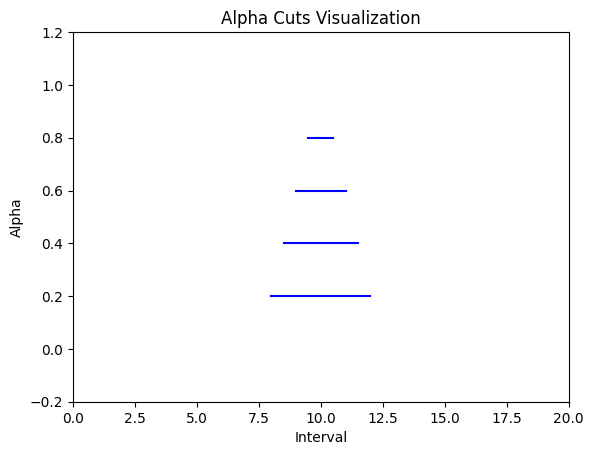

In [8]:
# Visualize fuzzy set 1
fuzzy_set1.visualize_horizontally()

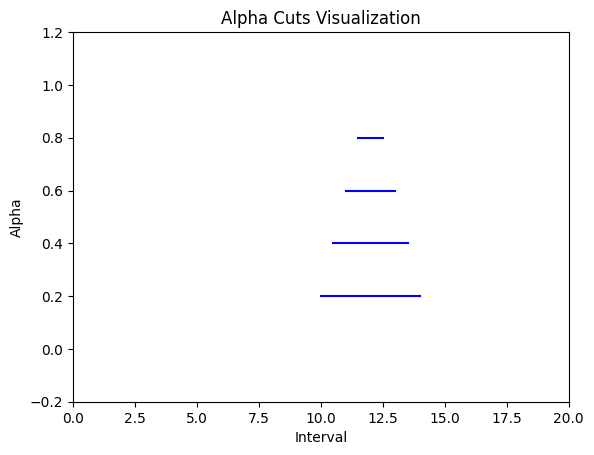

In [9]:
# Visualize fuzzy set 2
fuzzy_set2.visualize_horizontally()

### The combination methods

In [10]:
# AlphaFuzzyCombination instances with different combination functions
combination_t_norm = AlphaFuzzyCombination(fuzzy_set1, fuzzy_set2, t_norm_min)
combination_t_conorm = AlphaFuzzyCombination(fuzzy_set1, fuzzy_set2, t_conorm_max)
combination_addition = AlphaFuzzyCombination(fuzzy_set1, fuzzy_set2, addition)
combination_multiplication = AlphaFuzzyCombination(fuzzy_set1, fuzzy_set2, multiplication)
combination_lukasiewicz_t_norm = AlphaFuzzyCombination(fuzzy_set1, fuzzy_set2, lukasiewicz_t_norm)
combination_lukasiewicz_t_conorm = AlphaFuzzyCombination(fuzzy_set1, fuzzy_set2, lukasiewicz_t_conorm)

### Graph visualization

Visualizing T-norm (min) combination:


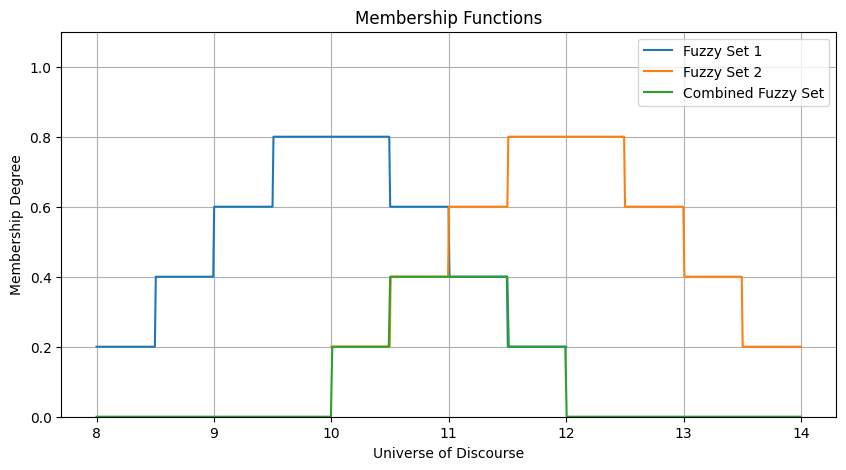

Visualizing T-conorm (max) combination:


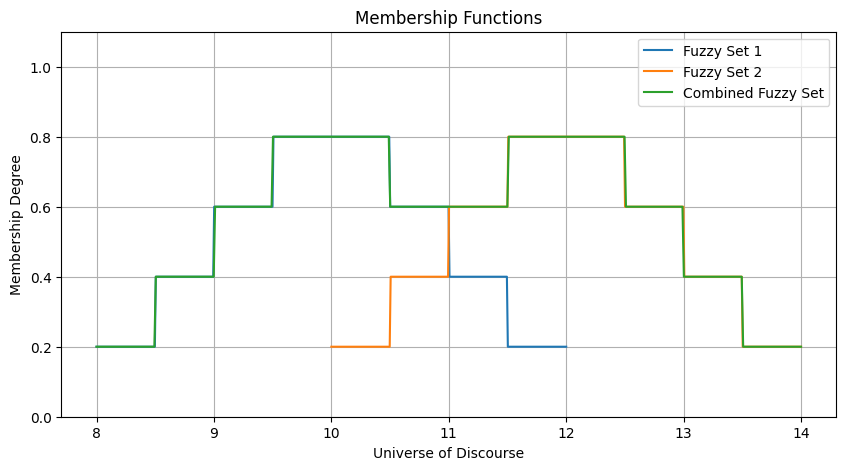

Visualizing Addition combination:


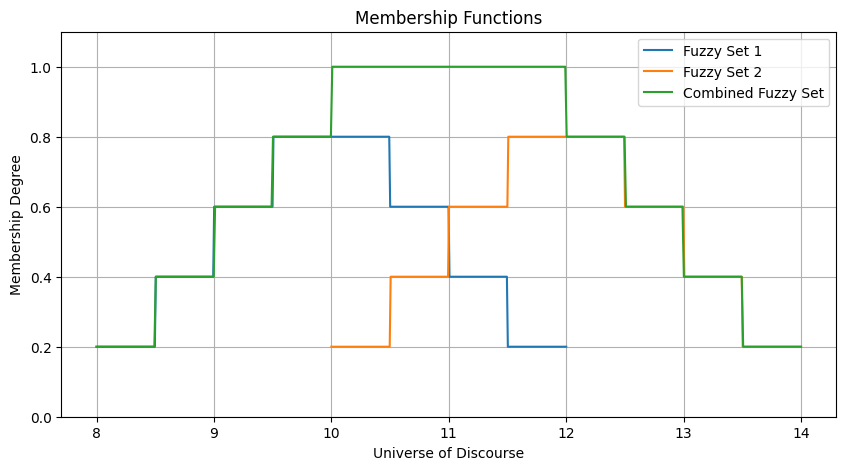

Visualizing Multiplication combination:


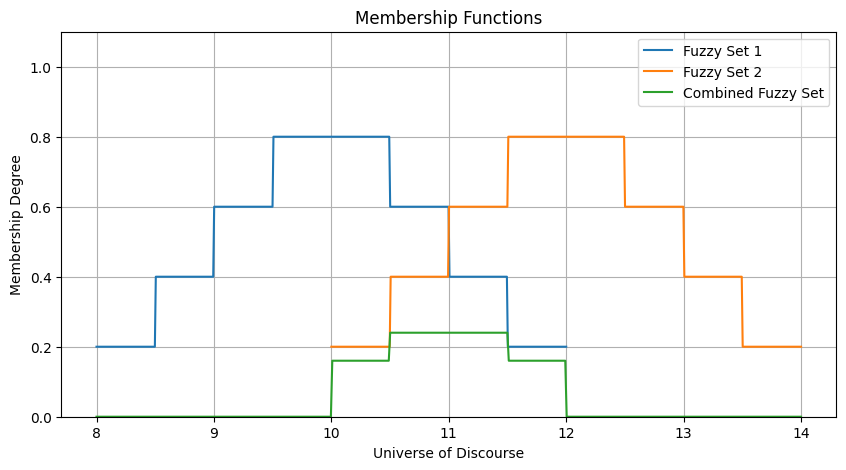

Visualizing Łukasiewicz T-norm combination:


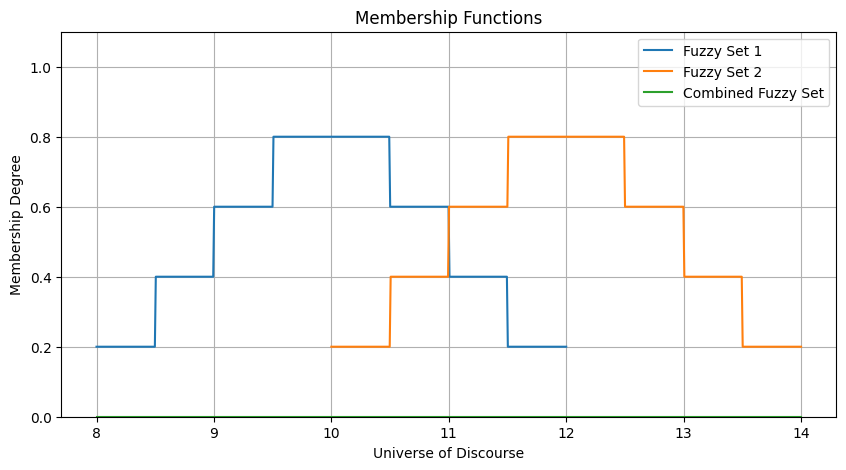

Visualizing Łukasiewicz T-conorm combination:


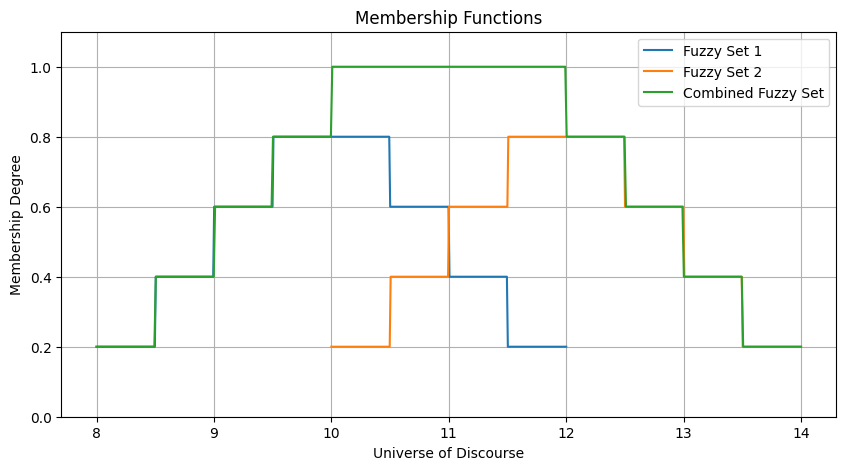

In [11]:
# Visualize the fuzzy sets and the combinations
print("Visualizing T-norm (min) combination:")
combination_t_norm.visualize()

print("Visualizing T-conorm (max) combination:")
combination_t_conorm.visualize()

print("Visualizing Addition combination:")
combination_addition.visualize()

print("Visualizing Multiplication combination:")
combination_multiplication.visualize()

print("Visualizing Łukasiewicz T-norm combination:")
combination_lukasiewicz_t_norm.visualize()

print("Visualizing Łukasiewicz T-conorm combination:")
combination_lukasiewicz_t_conorm.visualize()

### Testing functions

In [12]:
# Testing __getitem__ method
print(fuzzy_set1.__getitem__(0.2))

# Testing __call__ method
print(fuzzy_set1.__call__(9))

# Testing __eq__ method
print(fuzzy_set1.__eq__(fuzzy_set2))

[[8, 12]]
0.6
False


### Other fuzzy combination methods

In [13]:
# Drastic Product (T-norm) for alpha cuts
def drastic_product(alpha1, alpha2):
    if alpha1 == 1:
        return alpha2
    elif alpha2 == 1:
        return alpha1
    else:
        return 0

# Drastic Sum (T-conorm) for alpha cuts
def drastic_sum(alpha1, alpha2):
    if alpha1 == 0:
        return alpha2
    elif alpha2 == 0:
        return alpha1
    else:
        return 1

In [14]:
# AlphafuzzyCombination with different fuzzy combination
combination_drastic_product = AlphaFuzzyCombination(fuzzy_set1, fuzzy_set2, drastic_product)
combination_drastic_sum = AlphaFuzzyCombination(fuzzy_set1, fuzzy_set2, drastic_sum)

Visualizing Drastic Product combination:


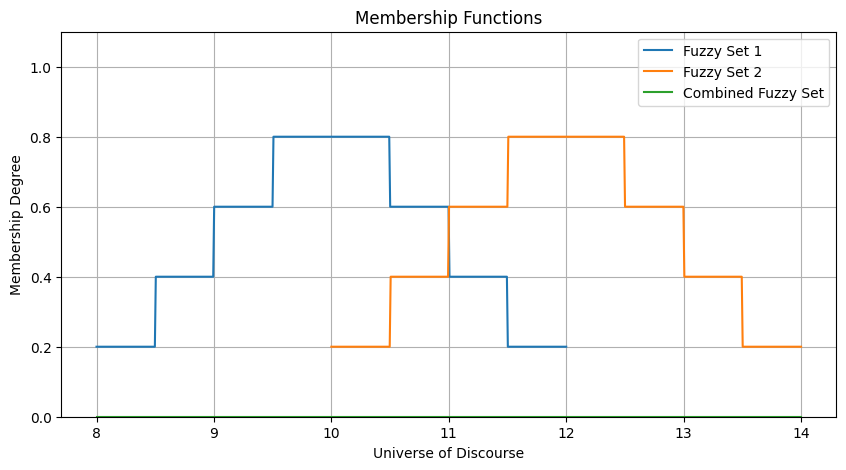

Visualizing Drastic Sum combination:


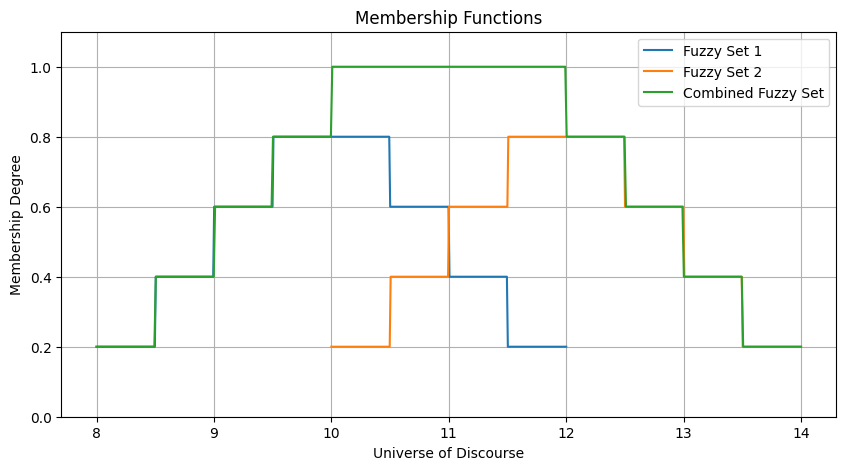

In [15]:
# Visualize the combinations
print("Visualizing Drastic Product combination:")
combination_drastic_product.visualize()

print("Visualizing Drastic Sum combination:")
combination_drastic_sum.visualize()

### Other, more articulated, example fuzzy sets

In [16]:

interval3 = {
    1.0: [[1, 2], [14,15]],
    0.8: [[1, 4], [12, 15]],
    0.4: [[1, 6], [10, 15]],
    0.2: [[1, 15]],
    0.0: [[float('-inf'), float('inf')]]
}

interval4 = {
    1.0: [[3.2, 4.2], [7.2 , 8.2], [11.2 , 12.2], [14.2, 15.2]],
    0.8: [[3.2, 8.2], [11.2, 15.2]],
    0.6: [[3.2, 9.2], [10.2, 15.2]],
    0.4: [[3.2, 15.2]],
    0.0: [[float('-inf'), float('inf')]]
}

In [17]:
fuzzy_set3 = AlphaFuzzySet(interval3)
fuzzy_set4 = AlphaFuzzySet(interval4)

### Visualiztion of the alpha-cuts

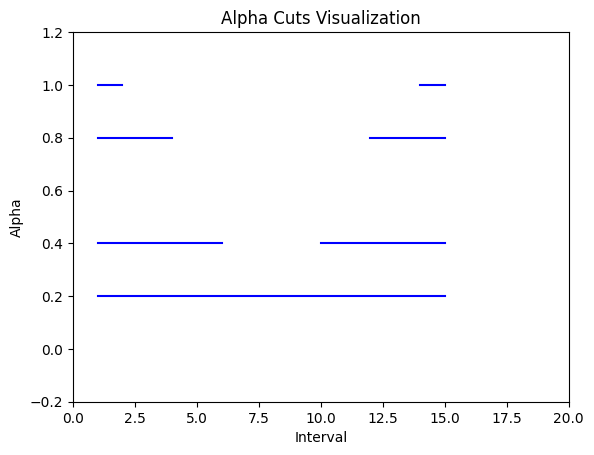

In [18]:
fuzzy_set3.visualize_horizontally()

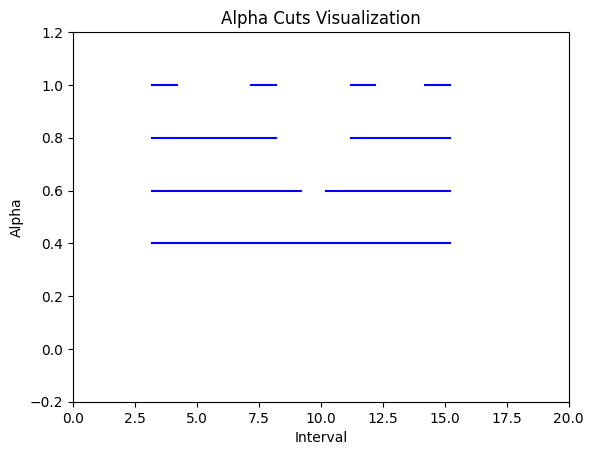

In [19]:
fuzzy_set4.visualize_horizontally()

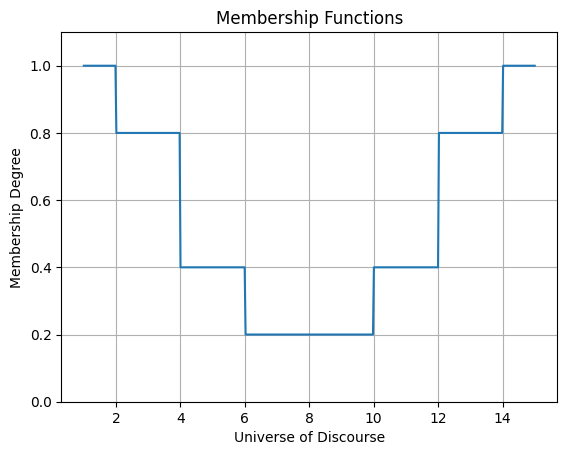

In [20]:
fuzzy_set3.visualize()

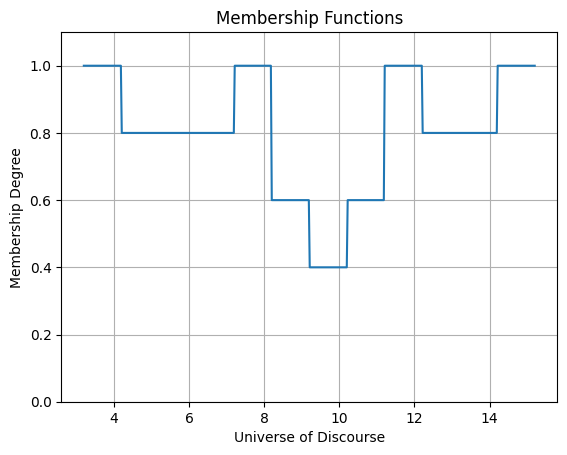

In [21]:
fuzzy_set4.visualize()

### the combination methods

In [22]:
combination_t_norm_34 = AlphaFuzzyCombination(fuzzy_set3, fuzzy_set4, t_norm_min)
combination_t_conorm_34 = AlphaFuzzyCombination(fuzzy_set3, fuzzy_set4, t_conorm_max)
combination_addition_34 = AlphaFuzzyCombination(fuzzy_set3, fuzzy_set4, addition)
combination_multiplication_34 = AlphaFuzzyCombination(fuzzy_set3, fuzzy_set4, multiplication)
combination_lukasiewicz_t_norm_34 = AlphaFuzzyCombination(fuzzy_set3, fuzzy_set4, lukasiewicz_t_norm)
combination_lukasiewicz_t_conorm_34 = AlphaFuzzyCombination(fuzzy_set3, fuzzy_set4, lukasiewicz_t_conorm)
combination_drastic_product_34 = AlphaFuzzyCombination(fuzzy_set3, fuzzy_set4, drastic_product)
combination_drastic_sum_34 = AlphaFuzzyCombination(fuzzy_set3, fuzzy_set4, drastic_sum)

### Graph visualization

Visualizing T-norm (min) combination:


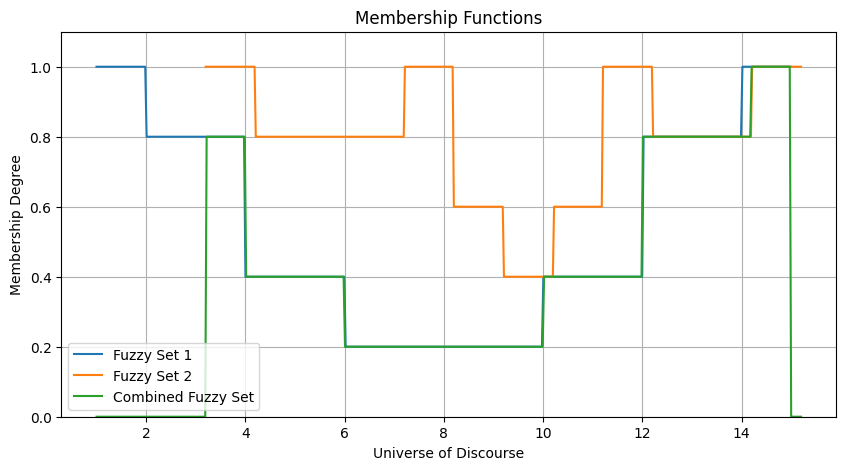

Visualizing T-conorm (max) combination:


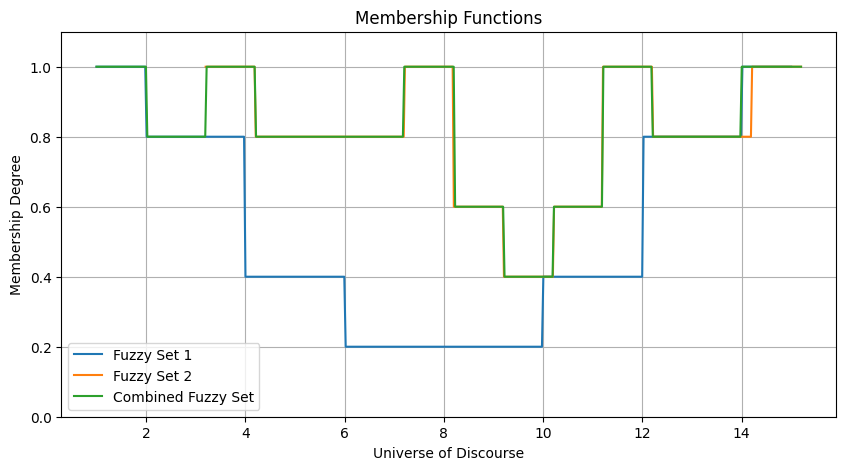

Visualizing Addition combination:


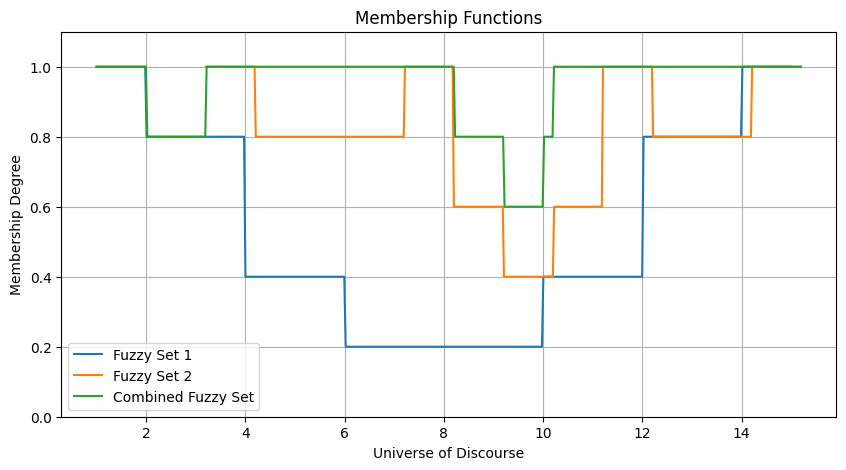

Visualizing Multiplication combination:


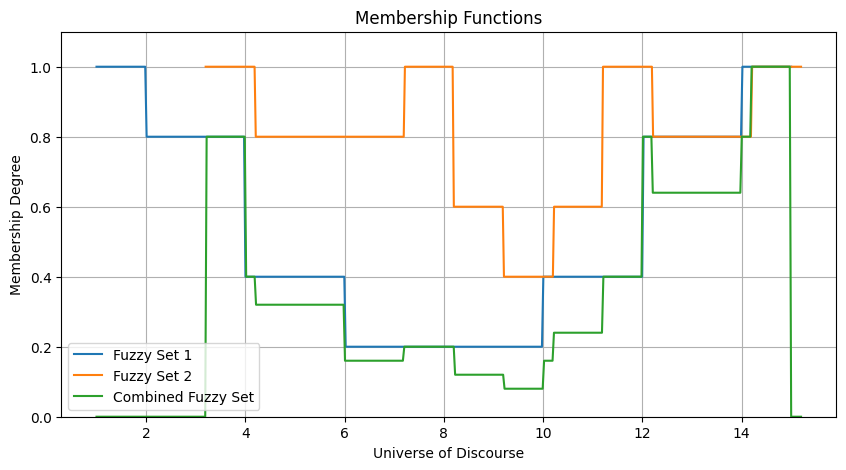

Visualizing Łukasiewicz T-norm combination:


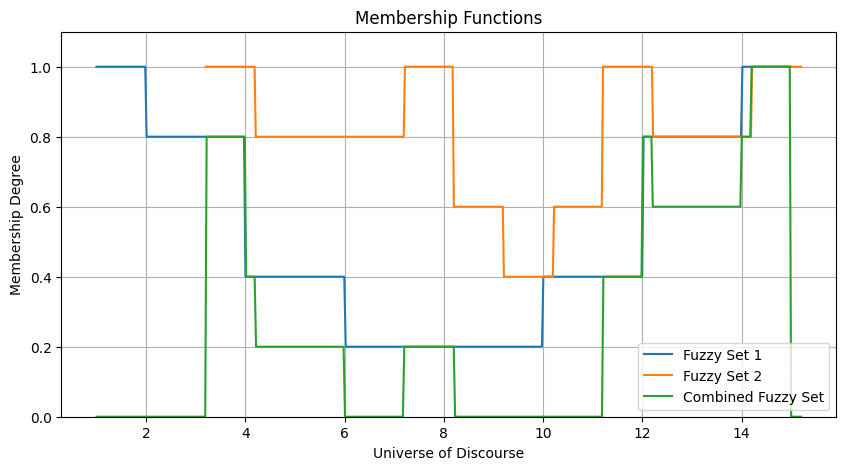

Visualizing Łukasiewicz T-conorm combination:


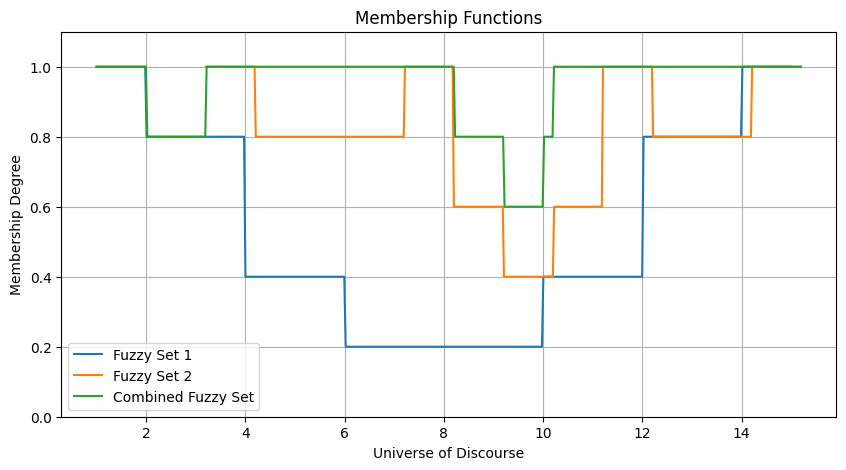

Visualizing Drastic Product combination:


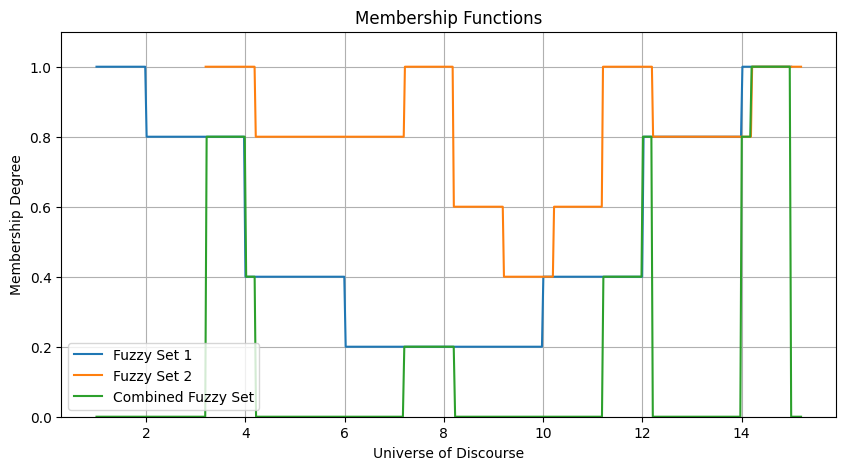

Visualizing Drastic Sum combination:


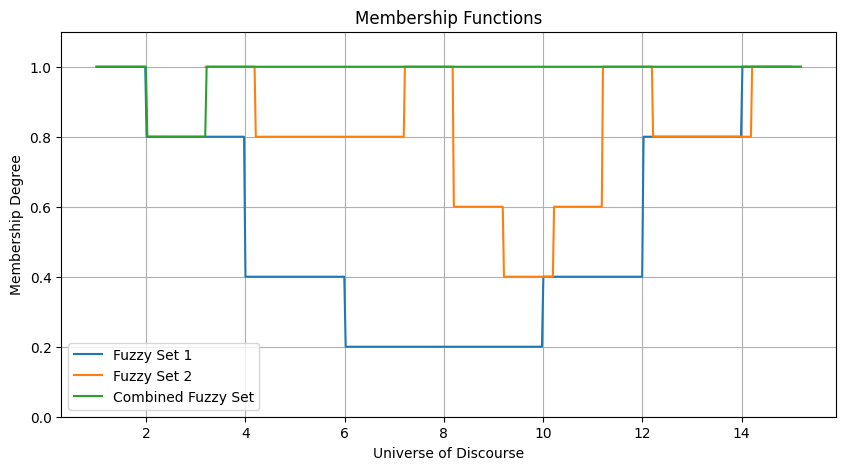

In [23]:
print("Visualizing T-norm (min) combination:")
combination_t_norm_34.visualize()

print("Visualizing T-conorm (max) combination:")
combination_t_conorm_34.visualize()

print("Visualizing Addition combination:")
combination_addition_34.visualize()

print("Visualizing Multiplication combination:")
combination_multiplication_34.visualize()

print("Visualizing Łukasiewicz T-norm combination:")
combination_lukasiewicz_t_norm_34.visualize()

print("Visualizing Łukasiewicz T-conorm combination:")
combination_lukasiewicz_t_conorm_34.visualize()

print("Visualizing Drastic Product combination:")
combination_drastic_product_34.visualize()

print("Visualizing Drastic Sum combination:")
combination_drastic_sum_34.visualize()
